In [1]:
import dit
import os

import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import auc

from dit import ScalarDistribution

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_root = '../data/xcov_importance/'

In [3]:
trans_amt = [0.0,0.1,0.3,0.5,0.7,0.9]

In [24]:
paths = [os.path.join(data_root,'dist_{}'.format(t)) for t in trans_amt]
z_I = [pd.read_pickle(os.path.join(p,'z_mutual_info.pk')) for p in paths]
dxs = [np.load(os.path.join(p,'dxs.npy')) for p in paths]
dys = [np.load(os.path.join(p,'dys.npy')) for p in paths]
hist = [pd.read_pickle(os.path.join(p, 'training_hist.df')) for p in paths]

In [9]:
z_dfs_xcov = pd.read_pickle('../data/style_embeddings/z_I.pk')
z_dfs_xcov['tx'] = z_dfs_xcov['translation']

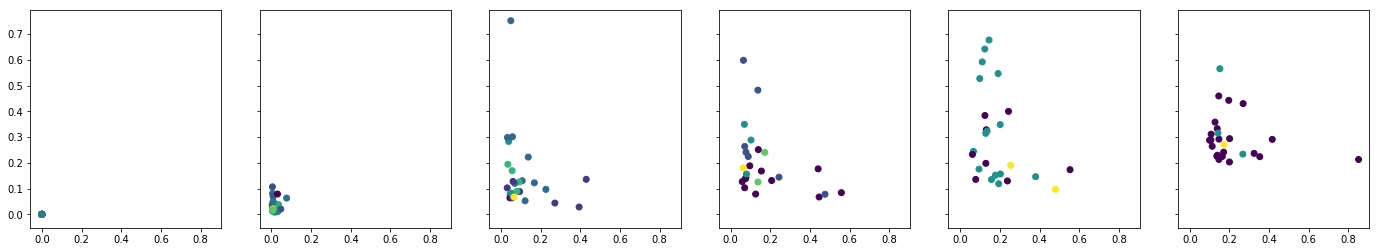

In [10]:
nt = len(trans_amt)
fig,axs = plt.subplots(1,nt,figsize=(4*nt,4),sharex=True,sharey=True)

for df,ax in zip(z_I,axs):
    ax.scatter(df['dx'],df['dy'],c=df['class'])

In [11]:
for df,tx in zip(z_I,trans_amt):
    df['tx'] = tx
    df['xcov'] = 0

In [12]:
z_df = pd.concat(z_I+[z_dfs_xcov[['class','dx','dy','tx','xcov']]])

In [13]:
filt = z_df['tx'].isin(trans_amt)

In [17]:
def plt_facet(*args,**kws):
    data = kws.pop("data").pivot(args[1], args[0])[args[2]]
    print(data.head())
    X, Y = np.meshgrid(data.columns, data.index)
    ax = plt.gca()
    mappable = ax.scatter(X, Y, data, *args[3:], **kws)
    sns.scatterplot(data=data,**kws)
    ax.figure.colorbar(mappable)

In [18]:
import matplotlib as mpl
norm = mpl.colors.Normalize(vmin=0,vmax=1)
sm = plt.cm.ScalarMappable(cmap='plasma', norm=norm)
sm.set_array([])

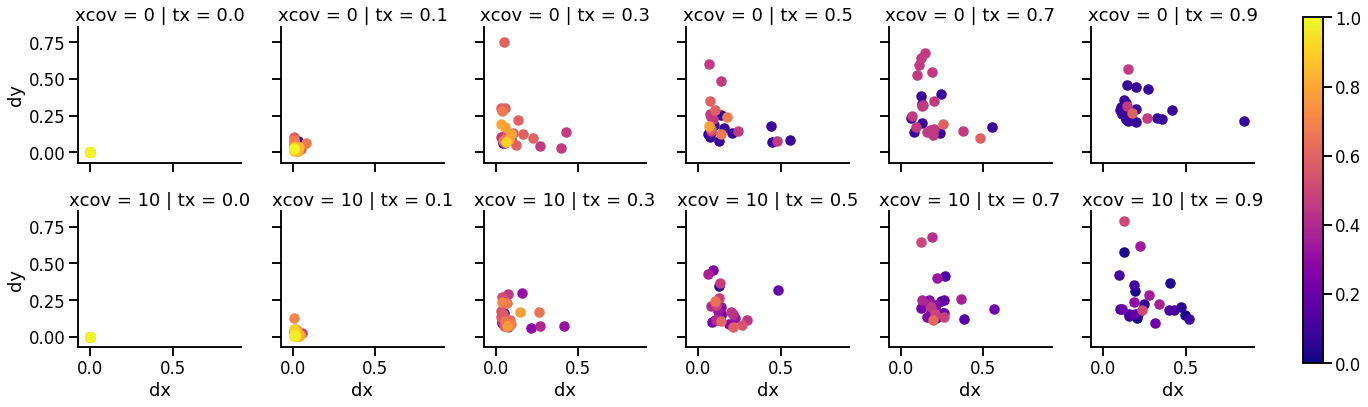

In [19]:
sns.set_context('talk')
g = sns.FacetGrid(z_df[filt],row='xcov',col='tx',hue='class',palette='plasma',aspect=1,height=3)
g.map(plt.scatter,'dx','dy')
cbar_ax = g.fig.add_axes([1.015,0.13, 0.015, 0.8])
plt.colorbar(sm,cax=cbar_ax)

In [20]:
g.savefig('/home/elijahc/projects/updates/2019-02-05/assets/img/xcov_mutual_info.png')

In [25]:
hist[3].head()

,G_loss,G_mse,class_acc,class_loss,loss,val_G_loss,val_G_mse,val_class_acc,val_class_loss,val_loss
0,101.734628,101.734628,0.282947,2.317195,2578.123627,57.343077,57.343077,0.516000,1.301720,1453.102714
1,36.683874,36.683874,0.567368,1.152294,934.381239,41.657914,41.657914,0.610333,1.007542,1056.560969
2,30.196360,30.196360,0.629684,0.980213,769.612199,32.931971,32.931971,0.638667,0.922102,837.130793
3,27.487133,27.487133,0.662368,0.892861,700.571251,29.160492,29.160492,0.695000,0.827070,741.418360
4,25.766572,25.766572,0.692807,0.827968,656.583819,27.492492,27.492492,0.691667,0.790125,699.164153


In [66]:
def plot_train_hist(dfs,metric,yscale='linear',xlabel=None,ylabel=None,savefig=None):
    nt = len(dfs)
    
    fig,axs = plt.subplots(1,nt,figsize=(4*nt,4),sharex=True,sharey=True)

    for df,ax in zip(dfs,axs):
        sns.scatterplot(data=df[['{}'.format(metric),'val_{}'.format(metric)]],ax=ax,)
        if ylabel is not None:
            ax.set_ylabel(ylabel)
        if xlabel is not None:
            ax.set_xlabel(xlabel)
            
        plt.yscale(yscale)
        plt.tight_layout()
        
    if savefig is not None:
        fig.savefig(savefig)

In [49]:
def plot_dfs(dfs,**kws):
    nt = len(dfs)
    
    fig,axs = plt.subplots(1,nt,figsize=(4*nt,4),sharex=True,sharey=True)

    for df,ax in zip(dfs,axs):
        yield (df,ax)

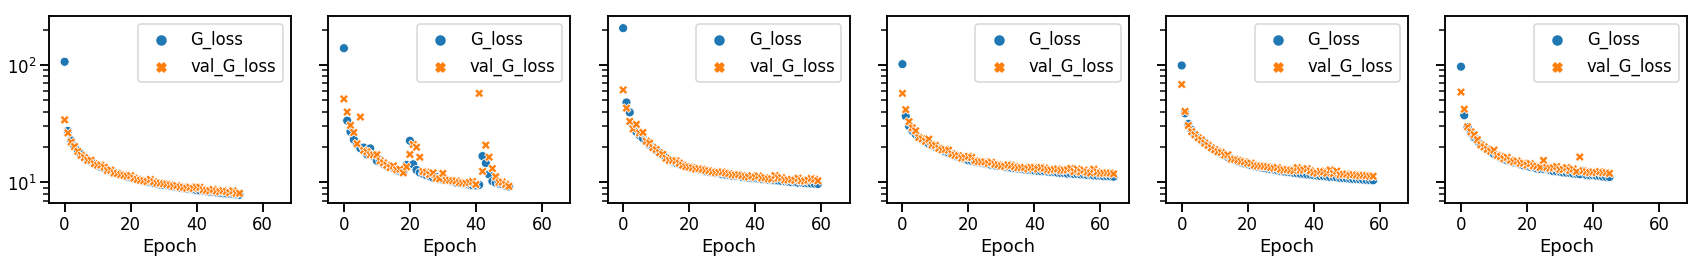

In [71]:
sns.set_context('talk')
plot_train_hist(hist,'G_loss',yscale='log',xlabel='Epoch',
                savefig='../../updates/2019-02-05/assets/img/xcov_train_g_loss.png')

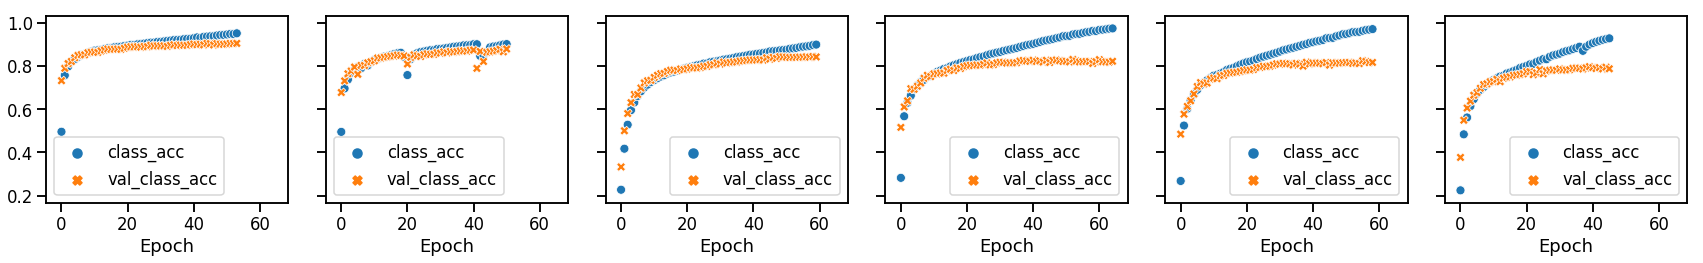

In [72]:
plot_train_hist(hist,'class_acc',xlabel='Epoch',
                savefig='../../updates/2019-02-05/assets/img/xcov_train_acc.png')

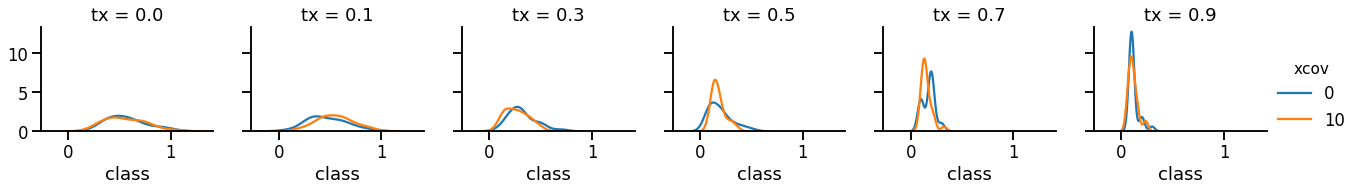

In [78]:
nt = len(z_I)
    
# fig,axs = plt.subplots(1,nt,figsize=(4*nt,4),sharex=True,sharey=True)


g = sns.FacetGrid(data=z_df[filt],col='tx',hue='xcov')
g.map(sns.distplot,'class',hist=False).add_legend()

g.savefig('../../updates/2019-02-05/assets/img/class_xcov_dist.png')